In [1]:
# Here are some libraries that we'll use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file1 = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
# show dataframe info

In [4]:
file1.head(1)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


In [5]:
file1.shape

(9134, 24)

In [6]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
# Describe DataFrame.

In [8]:
file1.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
# Show a plot of the total number of responses.

In [10]:
file1.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [11]:
counts = file1['Response'].value_counts()


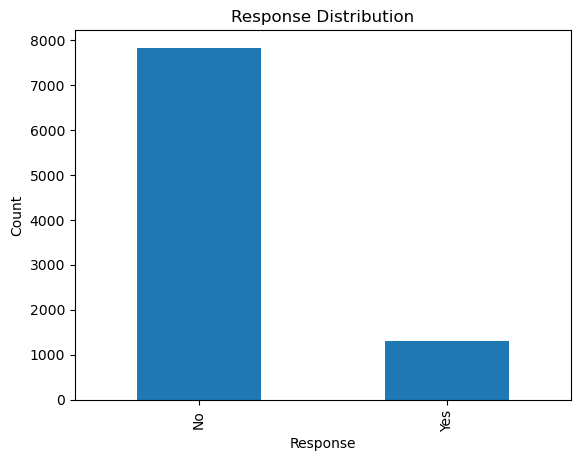

In [12]:
counts.plot(kind="bar")


plt.xlabel("Response")
plt.ylabel("Count")
plt.title("Response Distribution")


plt.show()

In [13]:
#Show a plot of the response rate by the sales channel.

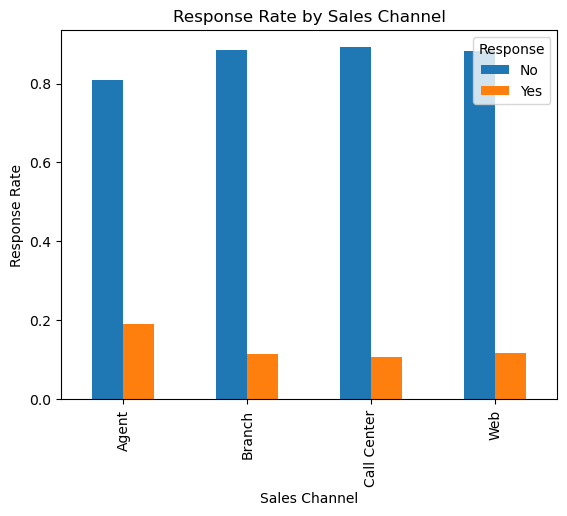

In [14]:

# use groupby (=somme.si.ens)
response_rates = file1.groupby('Sales Channel')["Response"].value_counts(normalize=True)


response_rates.unstack().plot(kind="bar")

# to get title
plt.xlabel("Sales Channel")
plt.ylabel("Response Rate")
plt.title("Response Rate by Sales Channel")

plt.show()

In [15]:
#Show a plot of the response rate by the total claim amount.

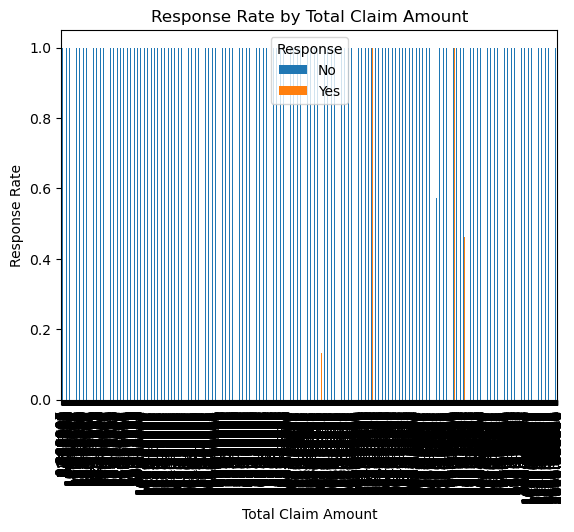

In [16]:
response_rates2 = file1.groupby('Total Claim Amount')["Response"].value_counts(normalize=True)

response_rates2.unstack().plot(kind="bar")

plt.xlabel("Total Claim Amount")
plt.ylabel("Response Rate")
plt.title("Response Rate by Total Claim Amount")

plt.show()

In [17]:
# I will split the total claim amount in 10 to have abetter understanding because the previous graph give us no help

In [18]:
file1['Total_Claim_Amount_Decile'] = pd.qcut(file1['Total Claim Amount'], q=10, labels=['D1', 'D2', 'D3', 'D4','D5', 'D6', 'D7', 'D8', 'D9', 'D10'])

file1[['Total Claim Amount', 'Total_Claim_Amount_Decile']]

,Total Claim Amount,Total_Claim_Amount_Decile
0,384.811147,D6
1,1131.464935,D10
2,566.472247,D8
3,529.881344,D8
4,138.130879,D2
...,...,...
9129,198.234764,D2
9130,379.200000,D5
9131,790.784983,D10
9132,691.200000,D9


In [19]:
# I'll make a new data frame with what I need

In [20]:
file2 = file1[['Total Claim Amount', 'Total_Claim_Amount_Decile','Response']]

In [21]:
file2.head()

,Total Claim Amount,Total_Claim_Amount_Decile,Response
0,384.811147,D6,No
1,1131.464935,D10,No
2,566.472247,D8,No
3,529.881344,D8,No
4,138.130879,D2,No


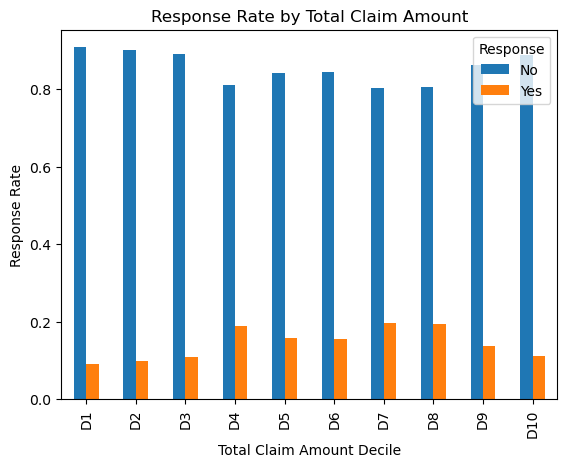

In [22]:
response_rates3 = file2.groupby('Total_Claim_Amount_Decile')["Response"].value_counts(normalize=True)

response_rates3.unstack().plot(kind="bar")

plt.xlabel("Total Claim Amount Decile")
plt.ylabel("Response Rate")
plt.title("Response Rate by Total Claim Amount")

plt.show()

In [34]:
# Show a plot of the response rate by income.

In [35]:
# Because there are so many values for 'income' I'll use the same methode

In [42]:
file1['Income_Decile'] = pd.qcut(file1['Income'], q=10, labels=['D1', 'D2', 'D3', 'D4','D5', 'D6', 'D7', 'D8', 'D9', 'D10'])

file1[['Income', 'Income_Decile']]

,Income,Income_Decile
0,10000,D1
1,20000,D2
2,30000,D3
3,40000,D4
4,50000,D5
5,60000,D6
6,70000,D7
7,80000,D8
8,90000,D9
9,100000,D10


In [45]:
file1.head(1)

,Income,Income_Decile
0,10000,D1


In [46]:
filenew = pd.read_csv('marketing_customer_analysis.csv')

In [57]:
filenew.head(1)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


In [58]:
filenew['Income_Decile'] = pd.qcut(file1['Income'], q=10, labels=['D1', 'D2', 'D3', 'D4','D5', 'D6', 'D7', 'D8', 'D9', 'D10'])

filenew[['Income', 'Income_Decile', 'Response']]

,Income,Income_Decile,Response
0,56274,D1,No
1,0,D2,No
2,48767,D3,No
3,0,D4,No
4,43836,D5,No
...,...,...,...
9129,71941,NaN,No
9130,21604,NaN,Yes
9131,0,NaN,No
9132,21941,NaN,No


In [ ]:
# I don't get why I have NaN in Income_Decile on the filled rows on column income

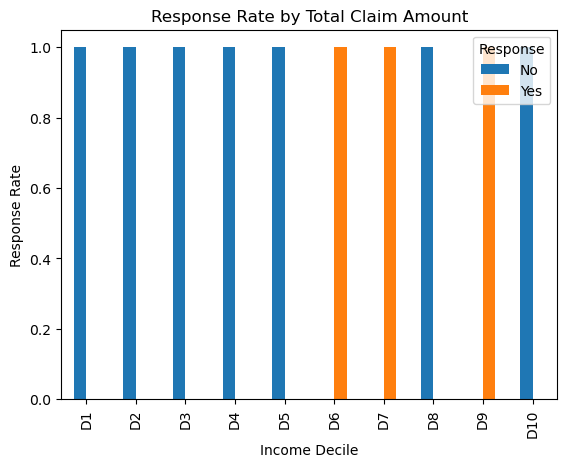

In [59]:
response_rates4 = filenew.groupby('Income_Decile')["Response"].value_counts(normalize=True)

response_rates4.unstack().plot(kind="bar")

plt.xlabel("Income Decile")
plt.ylabel("Response Rate")
plt.title("Response Rate by Total Claim Amount")

plt.show()

In [ ]:
# Nor right